# Data Processor

In [79]:
import networkx as nx
import pandas as pd
from collections import Counter


In [80]:
# maybe add file path?
class DataProcessor():
    
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        
        word_counter = Counter()
        relations_counter = Counter()
        
        for index, row in self.df.iterrows():
            word_counter.update([row['source'], row['target']])
            relations_counter.update([row['relation']])
        self.word_counter = word_counter
        self.relations_counter = relations_counter
        
    def get_df_with_relation(self, *relations):
        mp = {0:'source', 1:'relation', 2:'target'}
        columns = ['source', 'relation','target']
        new_df = pd.DataFrame(columns=columns) 
        for index, row in self.df.iterrows():
            if row['relation'] in relations:
                new_df.loc[len(new_df)] = [row[mp[i]] for i in range(3)]
        return new_df       
    
    def get_df_with_word(self, *words):        
        mp = {0:'source', 1:'relation', 2:'target'}
        columns = ['source', 'relation','target']
        new_df = pd.DataFrame(columns=columns) 
        for index, row in self.df.iterrows():
            if row['source']==word or row['target']==word:
                new_df.loc[len(new_df)] = [row[mp[i]] for i in range(3)]
        return new_df
    

    
        


In [81]:
file_path = 'data/triplets.csv'

In [82]:
generator = DataProcessor(file_path)

In [83]:
generator.word_counter.most_common()

[('protein', 14),
 ('phytochromes', 11),
 ('gene', 10),
 ('promoter', 10),
 ('biology', 9),
 ('retainers', 9),
 ('RBM20', 8),
 ('co-actor', 8),
 ('Day 28', 8),
 ("3',5'-cAMP", 8),
 ('sarcoplasm', 6),
 ('Mn transporter', 6),
 ('tratamiento', 6),
 ('GATA', 5),
 ('Arabidopsis thaliana', 5),
 ('CIPK23', 5),
 ('NRAMP1', 5),
 ('pregnancy', 5),
 ('postpartum', 5),
 ('genome', 5),
 ('teeth', 5),
 ('Removable (full-time) versus fixed', 5),
 ('caries', 5),
 ('antibiotics', 5),
 ('actin', 5),
 ('DCM', 4),
 ('chow', 4),
 ('in vitro', 4),
 ('in vivo', 4),
 ('neural network', 4),
 ('HCS', 4),
 ('AHB Gel', 4),
 ('tumor', 4),
 ('development', 4),
 ('phytochrome', 4),
 ('genomic', 4),
 ('malaria biology', 4),
 ('orthodontic', 4),
 ('studies', 4),
 ('retenedores fijos', 4),
 ('retenedores', 4),
 ('Igfbp-3', 4),
 ('periplasm', 4),
 ('32w PMA', 4),
 ('DNA', 3),
 ('Cas9', 3),
 ('tissues', 3),
 ('RNAs', 3),
 ('phenotypic', 3),
 ('drug discovery', 3),
 ('stem cell', 3),
 ('hydrogel', 3),
 ('Combination thera

In [90]:
df_opp = generator.get_df_with_relation('opposite of', 'instance of')


In [53]:
generator.get_df_with_word('phytochromes')

,source,relation,target
0,PHY1/3,parent taxon,phytochromes
1,PHY2/4,parent taxon,phytochromes
2,PHY5,parent taxon,phytochromes
3,PHY1,parent taxon,phytochromes
4,PHY1,parent taxon,phytochromes
5,PHY5,parent taxon,phytochromes
6,PHY5,parent taxon,phytochromes
7,PHY2/4,parent taxon,phytochromes
8,PHY1/3,parent taxon,phytochromes
9,PHY2/4,parent taxon,phytochromes


In [87]:
generator.relations_counter.most_common

<bound method Counter.most_common of Counter({'subclass of': 130, 'part of': 95, 'has part': 71, 'instance of': 47, 'different from': 46, 'facet of': 25, 'opposite of': 24, 'has effect': 22, 'has cause': 17, 'studied by': 16, 'parent taxon': 16, 'studies': 15, 'use': 12, 'followed by': 10, 'follows': 10, 'subject has role': 8, 'number of participants': 6, 'has parts of the class': 4, 'uses': 3, 'product or material produced': 3, 'developer': 2, 'medical condition treated': 2, 'connects with': 2, 'encodes': 1, 'located on terrain feature': 1, 'endemic to': 1, 'point in time': 1, 'drug used for treatment': 1, 'publication date': 1, 'owned by': 1, 'is a list of': 1, 'Gram staining': 1, 'taxonomic type': 1, 'author': 1})>

In [71]:
#kwargs??
def one_in(*args):
    return 1 in args
    

In [75]:
one_in(2,2, 213 ,342,121,2,1)

True

In [85]:
df_opp

,source,relation,target
0,mesenchymal,subclass of,precursor cells
1,pericyte,subclass of,periosteal
2,intramuscular xenograft animal model,subclass of,in vivo xenograft animal model
3,arginine-serine-rich,instance of,domain
4,RS domain deletion,instance of,mouse model
...,...,...,...
172,actin2,subclass of,actin
173,actin7,subclass of,actin
174,"2',3'-cAMP",instance of,"3',5'-cAMP"
175,"2',3'-cAMP",instance of,"3',5'-cAMP"


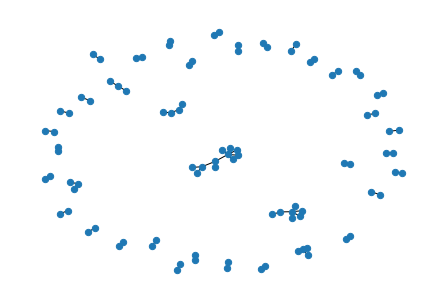

In [92]:
G = nx.from_pandas_edgelist(df_opp)
pos = nx.spring_layout(G)
nx.draw(G,node_size= 40, with_labels=False)